## Introduction

I am attempting to use a simpler set of equations (whereas before I was using a much more complex spherical coordinate system) to describe the model shown below. This model attempts to describe the line of sight between an observer and a target with a given elevation across a vast distance on a spherical Earth.

The following equations are used to define the model:

$$
\begin{align}
d = r\theta \\
(r + h_1)^2 = a_1^2 + (r + x)^2 \\
(r + h_2)^2 = a_2^2 + (r + x)^2 \\
a = a_1 + a_2 \\
a^2 = (r + h_1)^2 + (r + h_2)^2 - 2(r + h_1)(r + h_2)\cos(\theta) \\
\end{align}
$$

Equation (1) is a simple arc length formula formed by the assumed spherical surface of the Earth. Equations (2) and (3) are the Pythagorean theorem applied to the right triangles formed by the line of sight and the center of the Earth. Equation (4) is the sum of the two distances from the observer to the point where the line of sight is closest to the Earth and that same point to the target of observation. Equation (5) is the law of cosines applied to the triangle formed by the observer, the target, and the center of the Earth.


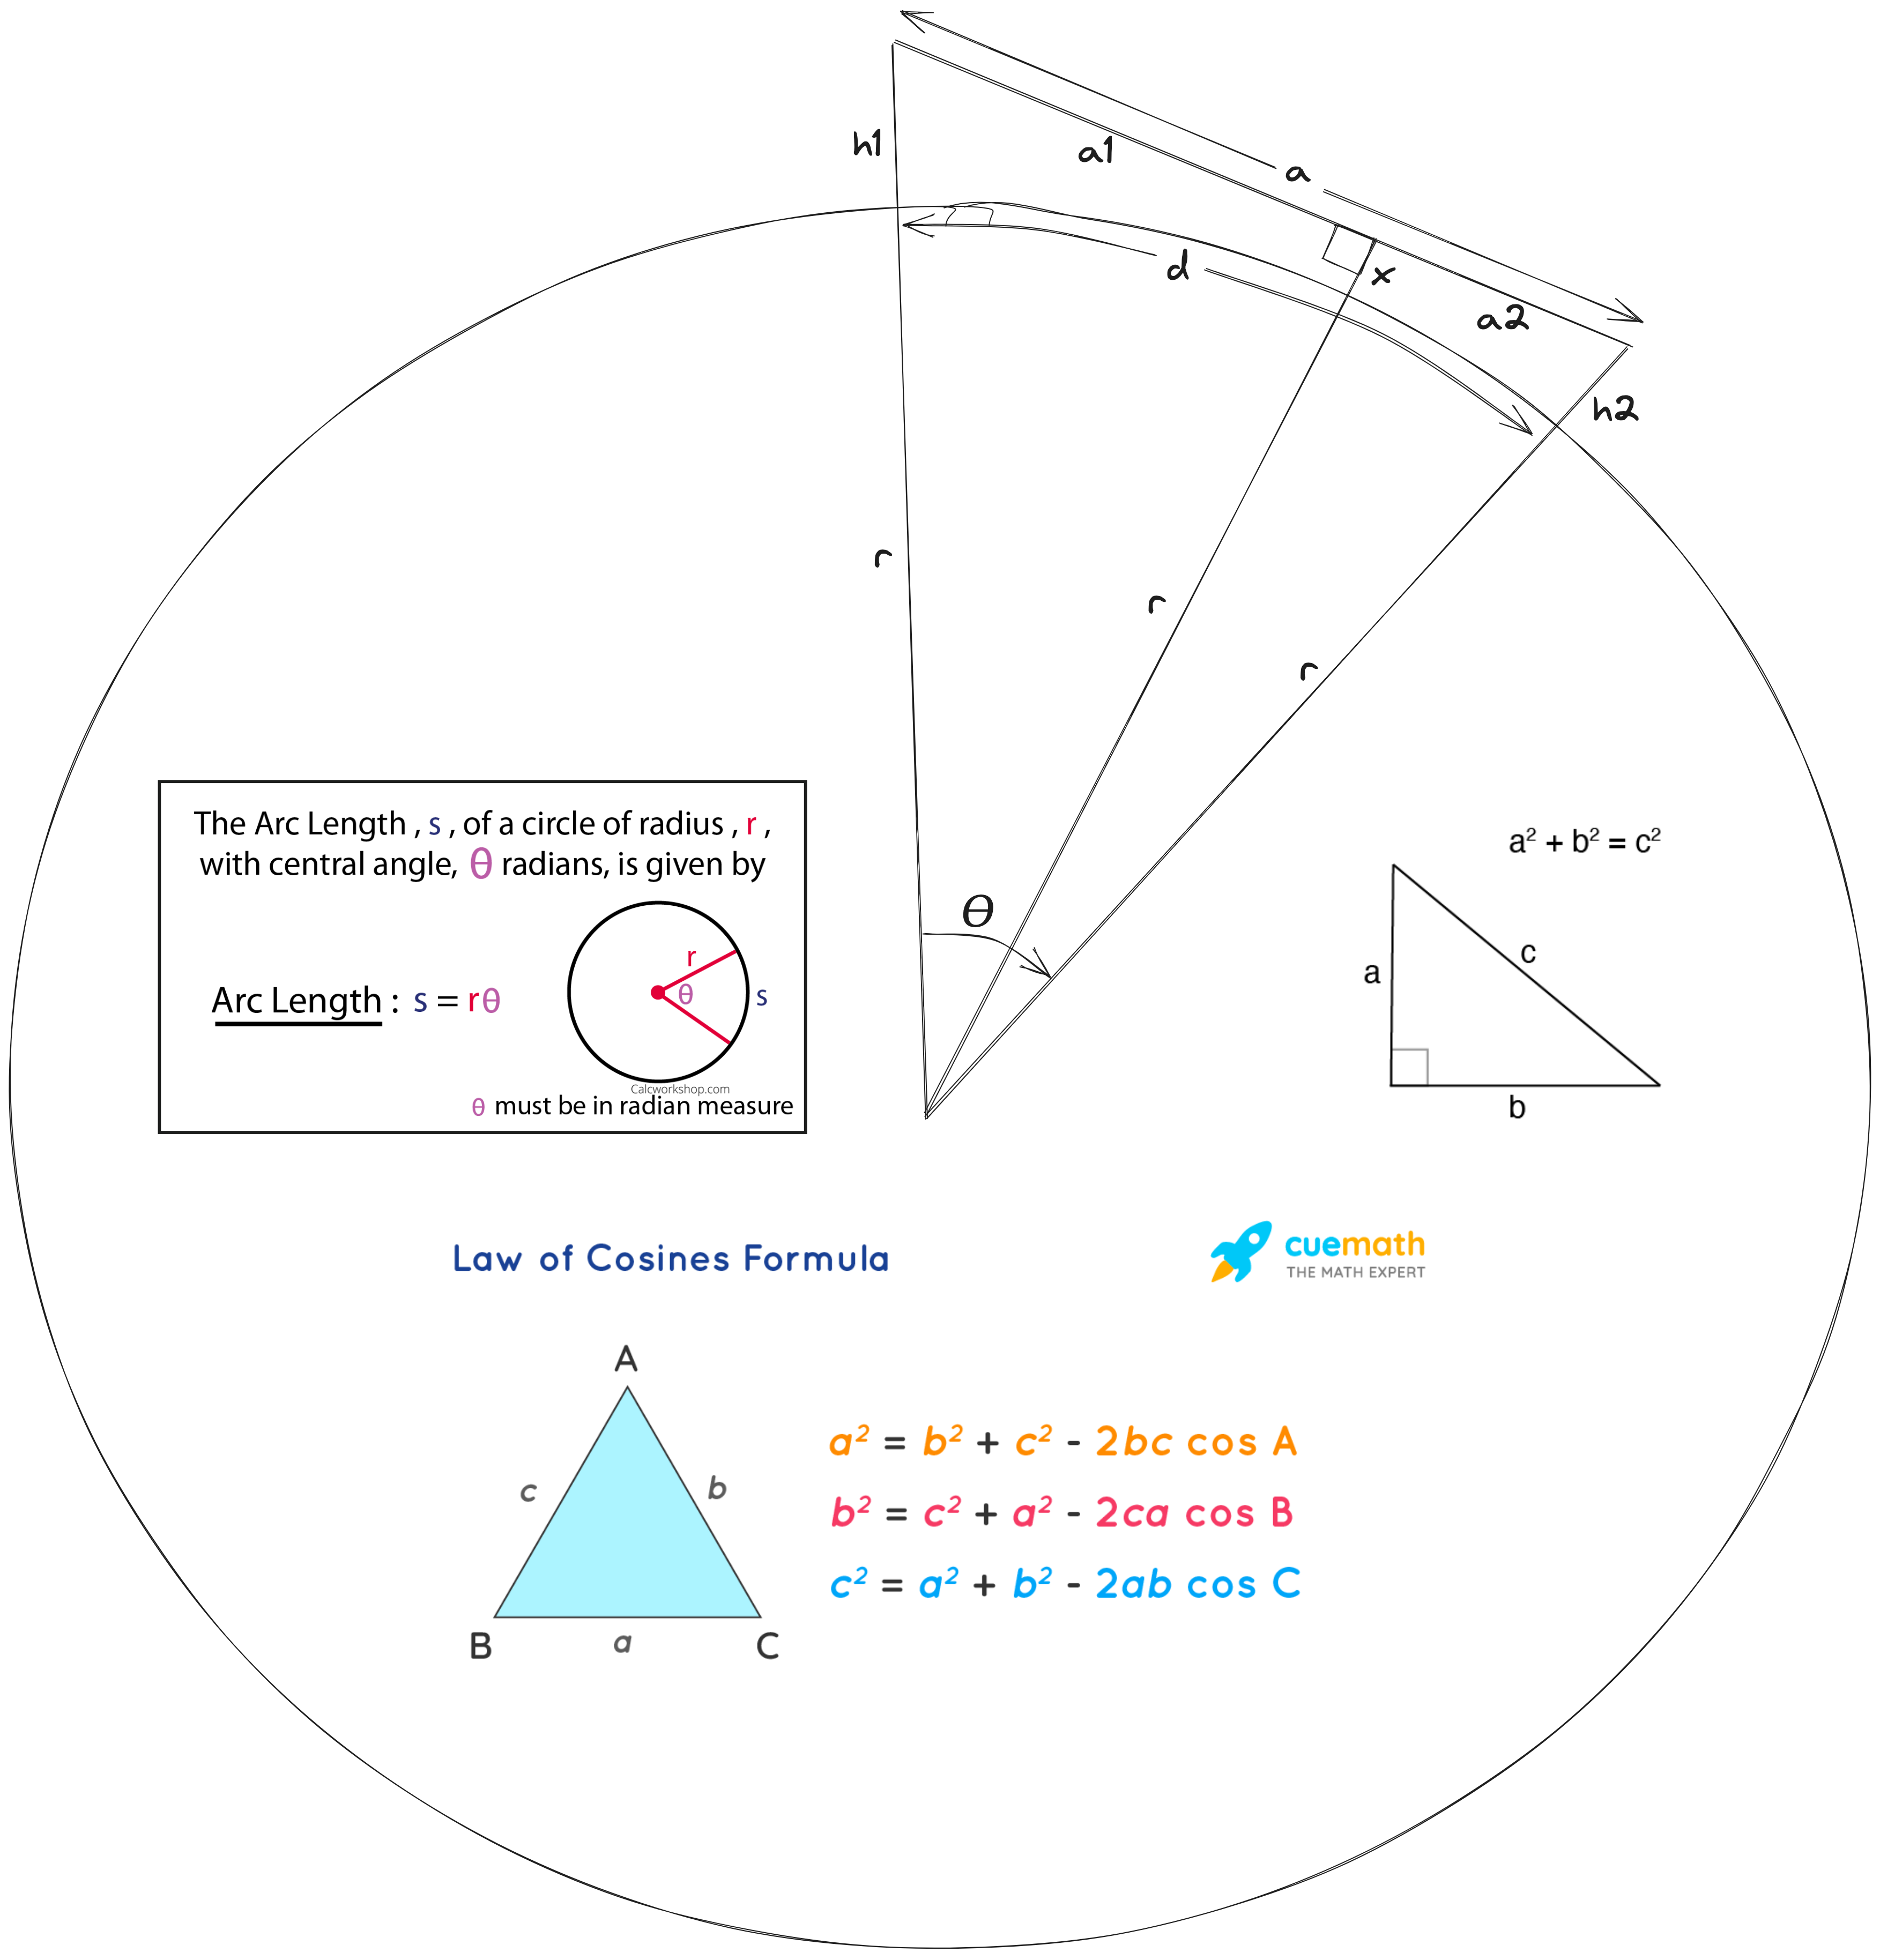

In [1]:
from IPython.display import Image, display
display(Image(filename='no-spherical-madness.png'))

The model and equations are applied below for the specific case of observing the Atlanta skyline from the top of Blood Mountain in Georgia:

### Given
* Distance (arc) between observer and target: $d = 100$ miles.
* Elevation of the observer: $h_1 = 4,458$ feet.
* Elevation of the target: $h_2 = 2000$ feet.

### Assumptions
* The Earth is a perfect sphere with radius: $r = 6378$ kilometers.

### Find
* The maximum elevation of the line of sight above the surface of the Earth where the observer can still see the target: $x$.

## Solution

First, we reduce the equations to a single equation in terms of $x$:

$$
d = r\theta \\
a^2 = (r + h_1)^2 + (r + h_2)^2 - 2(r + h_1)(r + h_2)\cos(\theta) \\
a^2 = (r + h_1)^2 + (r + h_2)^2 - 2(r + h_1)(r + h_2)\cos(\frac{d}{r})
$$

$$
a = a_1 + a_2 \\
a^2 = (a_1 + a_2)^2 \\
a^2 = a_1^2 + a_2^2 + 2a_1a_2 \\
$$

$$
a_1^2 = (r + h_1)^2 - (r + x)^2  \\
a_2^2 = (r + h_2)^2 - (r + x)^2  \\
2a_1a_2 = 2\sqrt{(r + h_1)^2 - (r + x)^2}\sqrt{(r + h_2)^2 - (r + x)^2} \\
$$

$$
(r + h_1)^2 - (r + x)^2 + (r + h_2)^2 - (r + x)^2 + 2\sqrt{(r + h_1)^2 - (r + x)^2}\sqrt{(r + h_2)^2 - (r + x)^2} = (r + h_1)^2 + (r + h_2)^2 - 2(r + h_1)(r + h_2)\cos(\frac{d}{r}) \\
-(r + x)^2 + \sqrt{(r + h_1)^2 - (r + x)^2}\sqrt{(r + h_2)^2 - (r + x)^2} = - (r + h_1)(r + h_2)\cos(\frac{d}{r}) \\
$$

Finally, we solve for $x$:

$$
(r + h_1)(r + h_2)\cos(\frac{d}{r}) - (r + x)^2 + \sqrt{(r + h_1)^2 - (r + x)^2}\sqrt{(r + h_2)^2 - (r + x)^2} = 0 \\
$$


In [22]:
from scipy.optimize import fsolve
import numpy as np
sqrt = np.emath.sqrt
cos = np.cos

# Blood Mountain -> Atlanta parameters:
mi_to_km = 1.609344
mi_to_ft = 5280

r_km = 6378

h1_ft = 4458
h1_km = h1_ft / mi_to_ft * mi_to_km

h2_ft = 2000
h2_km = h2_ft / mi_to_ft * mi_to_km

d_mi = 100
d_km = d_mi * mi_to_km

# Equation to compute x in feet
def f(x_ft):
    x_km = x_ft / mi_to_ft * mi_to_km
    return (r_km + h1_km) * (r_km + h2_km) * cos(d_km / r_km) - (r_km + x_km)**2 + sqrt((r_km + h1_km)**2 - (r_km + x_km)**2) * sqrt((r_km + h2_km)**2 - (r_km + x_km)**2)

# Solve for x in feet
x_ft = fsolve(f, 1)
print("x = {} ft".format(x_ft[0]))

x = 1336.6692053830718 ft
